# Задача 1 
Посчитать численно $DV01$ как разностную производную.
1. Номер выпуска облигации определяет функция getBond ниже 
1. Процентные ставки известны ниже curve_tenors, curve_rates
1. Использоватье линейнйую интерполяцию кубическими сплайнами (см. пример ниже)

$$ PV  = PV (r_1, r_2, r_3, ..., r_N) = \sum \limits_{i=1}^{N} \frac{C_i}{(1 + r_i)^{t_i}} $$
где $r_i$ - значение ставки, $C_i$ - выплата в день купонного платежа под номером $i$

$$ DV01 (r_1, r_2,  ..., r_N) = \lim \limits_{\delta \to 0} \frac{PV (r_1 + \delta r, r_2 + \delta r, ..., r_N + \delta r) - PV (r_1, r_2,  ..., r_N)}{\delta r}  \approx
\frac{PV (r_1 + \Delta r, r_2 + \Delta r, ..., r_N + \Delta r) - PV (r_1, r_2,  ..., r_N)}{\Delta r}$$

In [39]:
def getBond(email):
    ccy = ['53004RMFS', '53003RMFS', '53005RMFS']
    h = hash(email)
    return ccy[h % len(ccy)]
getBond('tarasow.se.al@gmail.com')

import numpy as np
import scipy.interpolate
import pandas as pd
import matplotlib.pyplot as plt

day count convention 
1. 	2020-03-04 	184 	6.50% 	32.77 			
2. 	2020-09-02 	182 	7.00% 	34.90 			
3. 	2021-03-03 	182 	7.05% 	35.15 		
4. 	2021-09-01 	182 	7.10% 	35.40 		
5. 	2022-03-02 	182 	7.25% 	36.15 		
6. 	2022-08-31 	182 	7.35% 	36.65

Последний день размещения: 2020.02.25, считаем PV на эту дату

8 days 00:00:00
fraction of year [0.02191781 0.52054795 1.01917808 1.51780822 2.01643836 2.51506849]
present_value 1089.410361197473
discount factors [0.99910905 0.97874401 0.95776648 0.93597612 0.91339792 0.89007188]


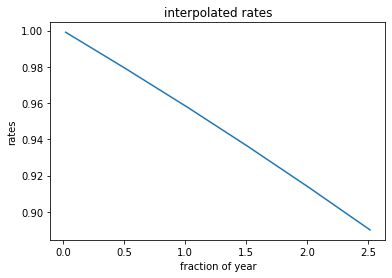

dv01 =  0.11853961002668711


In [2]:
#'53004RFMS'
print(pd.to_datetime('2020.03.04') - pd.to_datetime('2020.02.25')) #8 days 

days = np.array([8, 182, 182, 182, 182, 182])
coupons = np.array([32.77, 34.90, 35.15, 35.40, 36.15, 1036.65])
curve_tenors = np.array([0.0, 0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 15.0, 20.0, 30.0])
curve_rates = np.array([4.15, 4.17,4.21,4.26,4.32,4.59,4.88,5.41,5.83,6.26,6.62,6.79,6.98])*1e-2
fraction_of_year = np.cumsum(days)/365.0 

print('fraction of year', fraction_of_year)
def rates(curve_rates, curve_tenors, fraction_of_year):
    f = scipy.interpolate.interp1d(curve_tenors, curve_rates, kind = 'cubic')
    return f(fraction_of_year) #interpolating rates

def df(interpolated_rates, fraction_of_year):
    df = np.power(1.0 / (interpolated_rates + 1.0), fraction_of_year)
    return df

def pv(coupons, curve_rates, curve_tenors, fraction_of_year):
    interpolated_rates = rates(curve_rates, curve_tenors, fraction_of_year)
    discount_factors = df(interpolated_rates, fraction_of_year)
    return np.sum(coupons * discount_factors)

interpolated_rates = rates(curve_rates, curve_tenors, fraction_of_year)
discount_factors = df(interpolated_rates, fraction_of_year)
present_value = pv(coupons, curve_rates, curve_tenors, fraction_of_year)
print('present_value', present_value)
print('discount factors', df(interpolated_rates, fraction_of_year))

fig, ax = plt.subplots()
ax.plot(fraction_of_year, discount_factors)
ax.set(xlabel='fraction of year', ylabel='rates', title='interpolated rates')
plt.show()

dv01 = 0.5*(pv(coupons, curve_rates, curve_tenors - 1e-4, fraction_of_year) - pv(coupons, curve_rates + 1e-4, curve_tenors, fraction_of_year))
print('dv01 = ', dv01) #positive, assuming rates are decreasing

# Задача 2

1. Таблица ниже описывает облигацию, необходимо ее захеджировать [ОФЗ](https://special.minfin.gov.ru/ru/document/?id_4=130822-parametry_obligatsii_federalnogo_zaima_dlya_fizicheskikh_lits_ofz-n_vypuska__53006rmfs) 

Использовать для расчета $DV01$ [кривую](https://www.moex.com/ru/marketdata/indices/state/g-curve/)

Чему равна $beta$?


| Date | Coupon |
|-------|-----------|
| 2021-02-24 | 34.9 |
| 2021-08-25 | 34.9|
| 2022-02-23 | 34.9|
| 2022-08-24 | 34.9 |
| 2023-02-22 | 34.9 |
| 2023-08-23 | 1034.9|

2. Построить график $PV$ портфеля от величины вертикального сдвига кривой $\Delta$
$$ PV (r; \Delta) = PV (r_1 + \Delta, r_2+ \Delta, r_3+ \Delta, ..., r_N+ \Delta) = \sum \limits_{i=1}^{N} \frac{C_i}{(1 + r_i + \Delta)^{t_i}} $$





#1. Расчёт $\beta$

$\dfrac{d}{dr}(PV_{trade} + \beta PV_{hedge}) = 0 \Rightarrow \beta = - \dfrac{dv_{01}(PV_{trade})}{dv_{01}(PV_{hedge})}$   
Данные ОФЗ: 
1.  03.02.2021 	202 	4,10% 	22,69 		
2. 	04.08.2021 	182 	4,40% 	21,94 		
3. 	02.02.2022 	182 	4,70% 	23,44 		
4. 	03.08.2022 	182 	5,00% 	24,93 		
5. 	01.02.2023 	182 	5,30% 	26,43 		
6. 	02.08.2023 	182 	5,73% 	28,57 	

In [49]:
dates_trade = ['2021-02-24', '2021-08-25', '2022-02-23', '2022-08-24', '2023-02-22', '2023-08-23']
days_trade = np.array((pd.to_datetime(dates_trade) - pd.to_datetime('22.01.2021')).days) #последняя дата размещения ОФЗ -- 22.01.2021, cчитаем от нее
coupons_trade = np.array([34.9, 34.9, 34.9, 34.9, 34.9, 1034.9])
fraction_of_year_trade = np.cumsum(days_trade) / 365.0

dates_hedge = ['03.02.2021', '04.08.2021', '02.02.2022', '03.08.2022', '01.02.2023', '02.08.2023']
days_hedge = np.array((pd.to_datetime(dates_hedge) - pd.to_datetime('22.01.2021')).days)
coupons_hedge = np.array([22.69, 21.94, 23.44, 24.93, 26.43, 1028.57])
fraction_of_year_hedge = np.cumsum(days_hedge) / 365.0

curve_tenors = np.array([0.01, 0.25, 0.5, 0.75, 1, 2, 3, 5, 7, 10, 15, 20, 30])
curve_rates = np.array([4.95, 4.96,	4.99,	5.06,	5.16,	5.66,	6.13,	6.75,	7.06,	7.25,	7.39,	7.47, 7.5])*1e-2

pv_trade = pv(coupons_trade, curve_rates, curve_tenors, fraction_of_year_trade)
pv_hedge = pv(coupons_hedge, curve_rates, curve_tenors, fraction_of_year_hedge)

print('PV hedge =', pv_hedge)
print('PV trade =', pv_trade)

dv01_trade = 0.5*(pv(coupons_trade, curve_rates - 1e-4, curve_tenors, fraction_of_year_trade) - pv(coupons_trade, curve_rates + 1e-4, curve_tenors, fraction_of_year_trade))
dv01_hedge = 0.5*(pv(coupons_hedge, curve_rates - 1e-4, curve_tenors, fraction_of_year_hedge) -  pv(coupons_hedge, curve_rates + 1e-4, curve_tenors, fraction_of_year_hedge))
beta = - float(dv01_trade / dv01_hedge)

print('beta = ', beta)

PV hedge = 772.0705420042517
PV trade = 747.8193235479117
beta =  -1.134671845265287


#2. График PV от $\Delta$

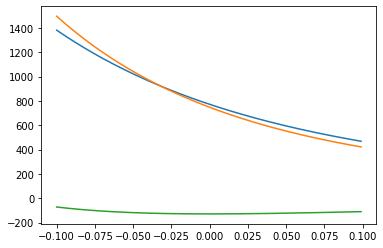

In [50]:
dr = np.arange(-0.1, 0.1, 1e-3)
pv_hedge, pv_trade, total_pv = [], [], []

for x in dr:
     pv_hedge += [pv(coupons_hedge, curve_rates + x, curve_tenors, fraction_of_year_hedge)]
     pv_trade += [pv(coupons_trade, curve_rates + x, curve_tenors, fraction_of_year_trade)]
     total_pv += [pv(coupons_hedge, curve_rates + x, curve_tenors, fraction_of_year_hedge) * beta + pv(coupons_trade, curve_rates + x, curve_tenors, fraction_of_year_trade)]

plt.plot(dr, pv_hedge)
plt.plot(dr, pv_trade)
plt.plot(dr, total_pv)
